# Rt Live Model

In [1]:
%load_ext autoreload
%autoreload 2

import pymc3 as pm
import pandas as pd
import numpy as np
import arviz as az
from matplotlib import pyplot as plt
from covid.models.generative import GenerativeModel
from covid.data import summarize_inference_data
%config InlineBackend.figure_format = 'retina'

from covid.data import get_and_process_covidtracking_data_il, summarize_inference_data

## Fetch data and select the state's data

In [2]:
df = get_and_process_covidtracking_data_il(run_date=pd.Timestamp.today()-pd.Timedelta(days=4))

In [3]:
region = "Israel"
model_data = df.loc[region]

## Create the model instance and sample

In [4]:
gm = GenerativeModel(region, model_data)
gm.sample()

Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, seed, log_r_t]


Sampling 4 chains for 700 tune and 200 draw iterations (2_800 + 800 draws total) took 1987 seconds.


## Summarize Model Output

In [5]:
result = summarize_inference_data(gm.inference_data)

In [6]:
result.tail(10)

,mean,median,lower_80,upper_80,infections,test_adjusted_positive,test_adjusted_positive_raw,positive,tests
date,,,,,,,,,
2020-07-06,1.364144,1.363332,1.143911,1.559745,442.025737,331.414337,285.451249,677.0,22278
2020-07-07,1.363364,1.361922,1.137567,1.563511,471.806929,353.106750,335.427688,744.0,20835
2020-07-08,1.364899,1.355114,1.158736,1.605390,503.873415,376.191434,383.797266,870.0,21293
2020-07-09,1.368381,1.355563,1.138231,1.619155,538.338305,400.776157,378.896715,824.0,20428
2020-07-10,1.369402,1.360545,1.128269,1.619269,575.585111,426.986477,356.742038,541.0,14245
2020-07-11,1.371355,1.361199,1.101012,1.602038,616.107541,454.953149,373.299061,319.0,8027
2020-07-12,1.374232,1.358909,1.113355,1.636476,660.239658,484.819245,461.220293,800.0,16293
2020-07-13,1.374186,1.361617,1.075924,1.610669,708.316210,516.756957,536.663508,938.0,16418
2020-07-14,1.374148,1.358556,1.082294,1.626277,760.884861,550.955607,493.317886,924.0,17594


## Plot Model Output

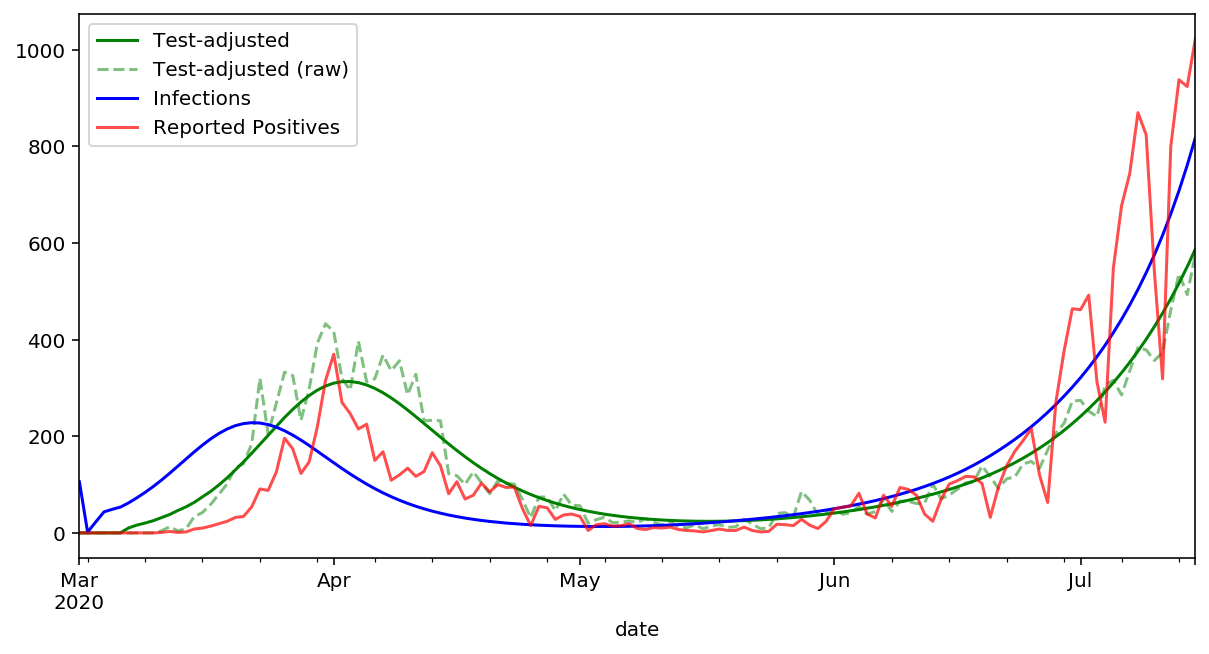

In [7]:
fig, ax = plt.subplots(figsize=(10,5))
result.test_adjusted_positive.plot(c="g", label="Test-adjusted")
result.test_adjusted_positive_raw.plot(c="g", alpha=.5, label="Test-adjusted (raw)", style="--")
result.infections.plot(c="b", label="Infections")
gm.observed.positive.plot(c='r', alpha=.7, label="Reported Positives")
fig.set_facecolor('w')
ax.legend();

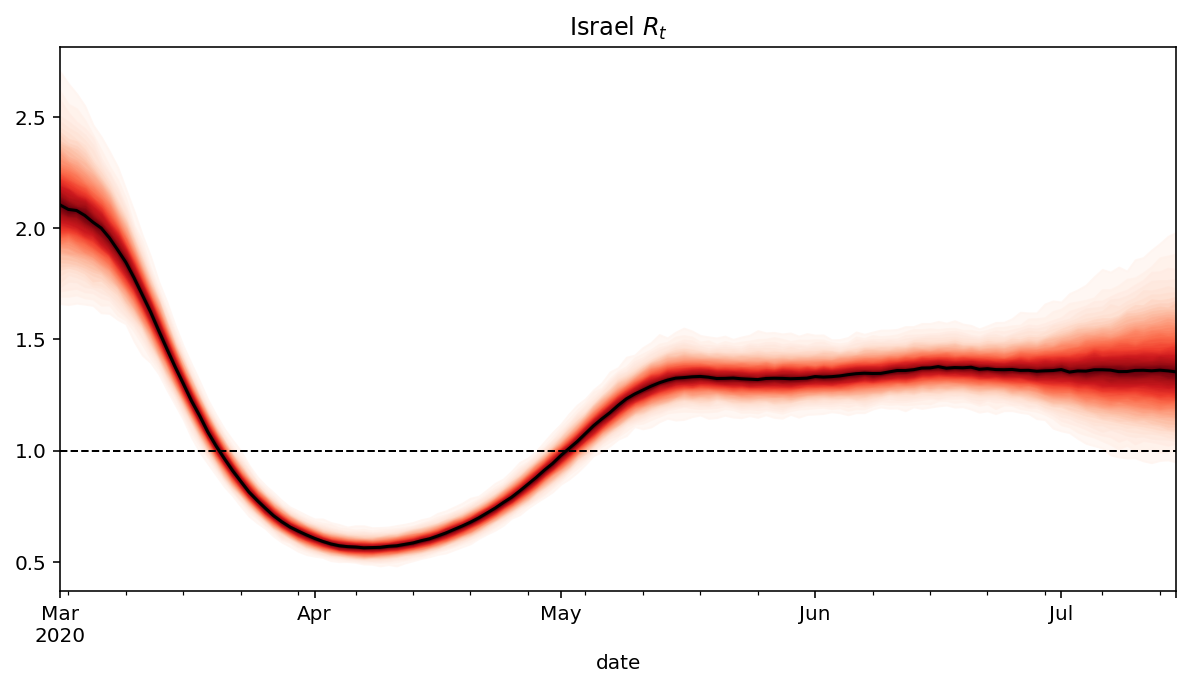

In [8]:
fig, ax = plt.subplots(figsize=(10,5))

ax.set_title(f"{region} $R_t$")
samples = gm.trace['r_t']
x=result.index
cmap = plt.get_cmap("Reds")
percs = np.linspace(51, 99, 40)
colors = (percs - np.min(percs)) / (np.max(percs) - np.min(percs))
samples = samples.T

result["median"].plot(c="k", ls='-')

for i, p in enumerate(percs[::-1]):
    upper = np.percentile(samples, p, axis=1)
    lower = np.percentile(samples, 100-p, axis=1)
    color_val = colors[i]
    ax.fill_between(x, upper, lower, color=cmap(color_val), alpha=.8)

ax.axhline(1.0, c="k", lw=1, linestyle="--")
fig.set_facecolor('w')